In [ ]:
import pyclesperanto as cle
from skimage.io import imread, imsave
import numpy as np
import matplotlib

### What devices are available and selecting devices

In [ ]:
cle.list_available_devices()

In [ ]:
cle.info() #global information about the GPUs available

In [ ]:
# initialize GPU; use everytime
device = cle.select_device("NVIDIA") #If multiple types of GPUs were available, can select a specific one with a string (will match)
#cle.select_device(1, device_type="gpu") #Alt way of selecting the GPU
#print("Used GPU: ", device)

### Sending data to the GPU

#### Can create space to use on the GPU

In [ ]:
empty_array = cle.create((128,128), dtype=np.float32) #dtype can be specified if wanted (64-bit not supported)
empty_array #array of the specified shape and dtype but filled with 0

#### Sending existing data to the GPU (Push)

In [ ]:
#Array of random ints
array = np.random.random((128,128)).astype(np.float32)
print(type(array), array.shape, array.dtype)

In [ ]:
random_array = cle.push(array)
random_array #calling the array makes a super awesome visual automatically!

#### Pull data off GPU

In [ ]:
read_array = cle.pull(random_array)
print(type(read_array), read_array.shape, read_array.dtype)

# Processing Data on GPU

#### Simple Processing (Crops, flips, pasting)

In [ ]:
image = cle.push(imread('https://samples.fiji.sc/blobs.png').squeeze())
image

In [ ]:
help(cle.crop) #get help for a command

##### Cropping a 75x75 area at (10,10)

In [ ]:
width, height = 75, 75
x, y = 10, 10
tile = cle.crop(image, start_x=x, start_y=y, width=width, height=height)
tile

##### Pasting the cropped data into a new array

In [ ]:
collage = cle.create((width*2+6, height*2+6), dtype=tile.dtype)
collage.fill(255) #fills array with a 'white' background
collage

In [ ]:
help(cle.paste)

In [ ]:
cle.paste(tile, collage, 2, 2) 
#Repeating this function with different values pastes the data 
#into the previous result i.e., the empty collage is not remade

In [ ]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flipped_tile, collage, width+4, 2)
collage

In [ ]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flipped_tile, collage, width+4, height+4)
collage

In [ ]:
flipped_tile = cle.flip(tile, flip_x=False, flip_y=True)
cle.paste(flipped_tile, collage, 2, height+4)
collage

In [51]:
read_array = cle.pull(collage)
read_array = cle.pull(flipped_tile)
read_array = cle.pull(image)
read_array = cle.pull(tile)

### Math Operations

In [52]:
import pyclesperanto as cle
import numpy as np

cle.get_device() # default device initialisation

(OpenCL) NVIDIA RTX A4000 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              572.83
	Device Type:                 GPU
	Compute Units:               48
	Global Memory Size:          16375 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4093 MB
	Max Clock Frequency:         1560 MHz
	Image Support:               Yes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32, mtype=buffer)
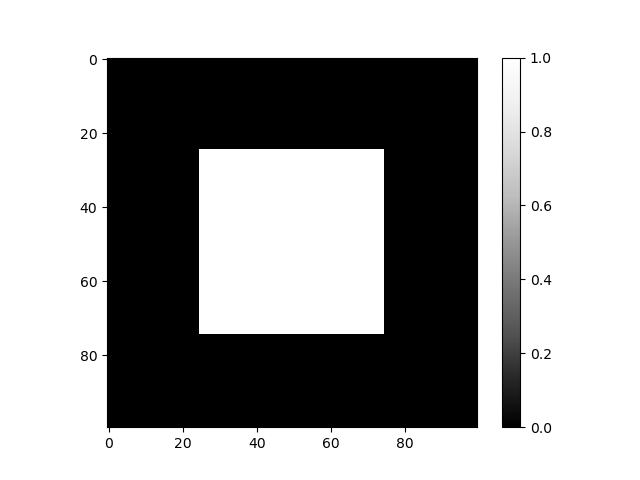
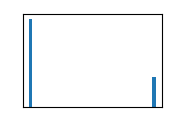

In [53]:
arr = np.zeros((100,100))
arr[25:75, 25:75] = 1
gpu_arr = cle.push(arr)
gpu_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
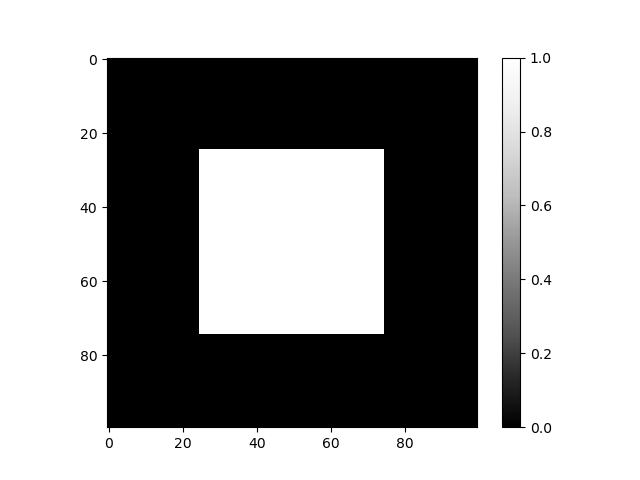
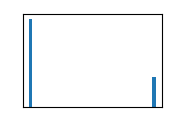

In [54]:
binary_arr = (gpu_arr == 1)
binary_arr

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8, mtype=buffer)
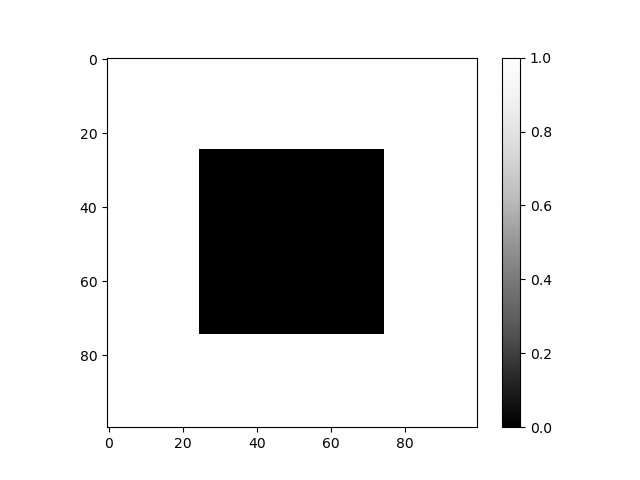
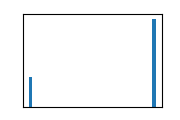

In [55]:
another_binary_image = (binary_arr == 0)
another_binary_image

#### Other operators:
array > x (cle.greater_constant)
array >= x (cle.greater_or_equal_constant)
array < x (cle.smaller_constant)
array <= x (cle.smaller_or_equal_constant)